# Importing libraries and Inspection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
# Checking the head of the dataset
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5338 non-null   int64  
 1   name                     5338 non-null   object 
 2   date                     5338 non-null   object 
 3   manner_of_death          5338 non-null   object 
 4   armed                    5098 non-null   object 
 5   age                      5089 non-null   float64
 6   gender                   5336 non-null   object 
 7   race                     4731 non-null   object 
 8   city                     5338 non-null   object 
 9   state                    5338 non-null   object 
 10  signs_of_mental_illness  5338 non-null   bool   
 11  threat_level             5338 non-null   object 
 12  flee                     5088 non-null   object 
 13  body_camera              5338 non-null   bool   
dtypes: bool(2), float64(1), 

# Data Cleansing

In [5]:
# Checking null values in every column
df.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                      True
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [6]:
# Fill null values with Unspecified except the age column (I will explain it later)
df[['armed', 'gender', 'race', 'flee']] = df[['armed', 'gender', 'race', 'flee']].fillna(value='Unspecified')

In [7]:
df.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                         True
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5338 non-null   int64  
 1   name                     5338 non-null   object 
 2   date                     5338 non-null   object 
 3   manner_of_death          5338 non-null   object 
 4   armed                    5338 non-null   object 
 5   age                      5089 non-null   float64
 6   gender                   5338 non-null   object 
 7   race                     5338 non-null   object 
 8   city                     5338 non-null   object 
 9   state                    5338 non-null   object 
 10  signs_of_mental_illness  5338 non-null   bool   
 11  threat_level             5338 non-null   object 
 12  flee                     5338 non-null   object 
 13  body_camera              5338 non-null   bool   
dtypes: bool(2), float64(1), 

# Feature Engineering

Race characterisation

In [9]:
def race(data):
    if data == 'W':
        return 'White'
    elif data == 'B':
        return 'Black'
    elif data == 'H':
        return 'Hispanic'
    elif data == 'A':
        return 'Asian'
    elif data == 'N':
        return 'Native'
    elif data == 'O':
        return 'Other'
    return 'Unspecified'

In [10]:
df['race'] = df['race'].apply(race)

Gender characterisation

In [11]:
def gender(data):
    if data == 'M':
        return 'Male'
    elif data == 'F':
        return 'Female'
    return 'Unspecified'

In [12]:
df['gender'] = df['gender'].apply(gender)

Splitting the month and year in the date column values then create new columns for the splitted values

In [13]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [14]:
time = pd.to_datetime(df['date'])

In [15]:
df['month'] = time.apply(lambda m: m.month).map(month_map)
df['year'] = time.apply(lambda y: y.year)

Age grouping

In [16]:
# This is why I didn't used the age column for my analysis. I used it just for grouping the age into generation
def group_age(data):
    if data <= 9:
        return 'Gen A / Alpha (9 and below)'
    elif data > 9 and data <= 24:
        return 'Gen Z / Zoomers (10-24)'
    elif data > 24 and data <= 40:
        return 'Gen Y / Millenials (25-40)'
    elif data > 40 and data <= 56:
        return 'Gen X (40-56)'
    elif data > 56:
        return 'Baby Boomers (57 and above)'
    return 'Unspecified'

In [17]:
df['generation'] = df['age'].apply(group_age)

State Grouping

In [18]:
# Creating the state's name for mapping
state = {'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'ID': 'Idaho',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NH': 'New Hampshire',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

In [19]:
# Renaming the column 'state' to 'code'
df.rename(columns={'state':'code'}, inplace=True)

In [20]:
# Mapping the state code into state name and put it in the new 'state' column
df['state'] = df['code'].map(state)

Checking the head of the dataset after feature engineering

In [21]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,code,signs_of_mental_illness,threat_level,flee,body_camera,month,year,generation,state
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,Jan,2015,Gen X (40-56),Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False,attack,Not fleeing,False,Jan,2015,Gen X (40-56),Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,Jan,2015,Gen Z / Zoomers (10-24),Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True,attack,Not fleeing,False,Jan,2015,Gen Y / Millenials (25-40),California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,Jan,2015,Gen Y / Millenials (25-40),Colorado


# Exploratory Data Analysis

Top 10 Fatal Police Shootings by state

Text(0.5, 1.0, 'Top 10 Fatal Police Shootings by State')

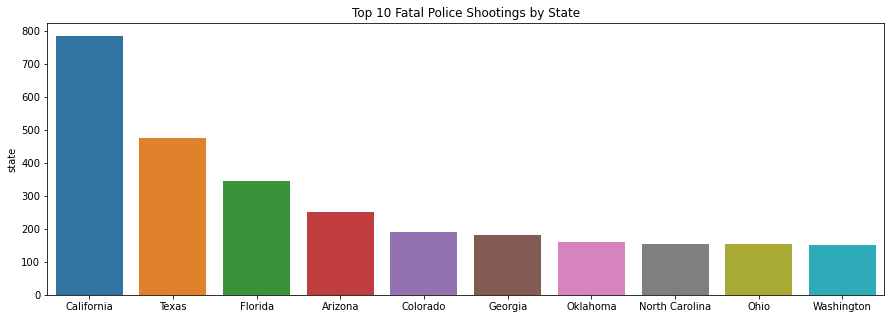

In [22]:
top_states = df['state'].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_states.index, y=top_states)
plt.title('Top 10 Fatal Police Shootings by State')

Top 10 Fatal Police Shootings by city

Text(0.5, 1.0, 'Top 10 Fatal Police Shootings by City')

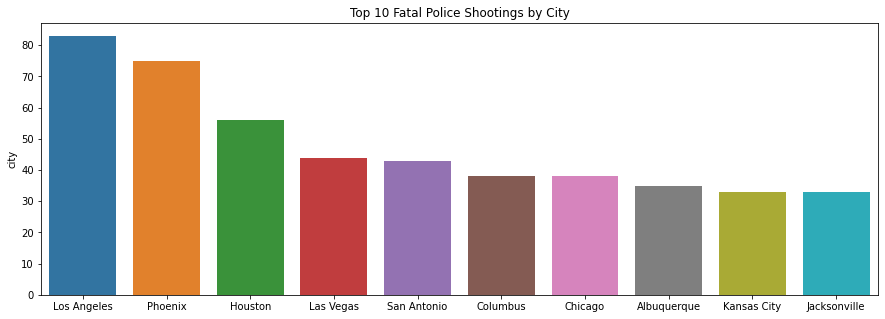

In [23]:
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_cities.index, y=top_cities)
plt.title('Top 10 Fatal Police Shootings by City')

Top 10 Fatal Police Shootings by Item

Text(0.5, 1.0, 'Top 10 Fatal Police Shootings by Item')

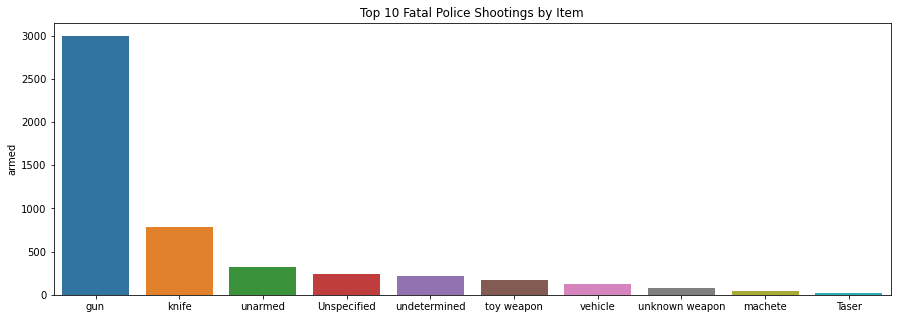

In [24]:
top_items = df['armed'].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_items.index, y=top_items)
plt.title('Top 10 Fatal Police Shootings by Item')

Fatal Police Shootings by Gender

Text(0.5, 1.0, 'Fatal Police Shootings by Gender')

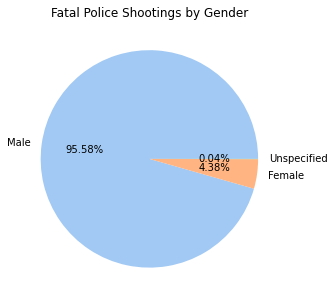

In [25]:
colors = sns.color_palette('pastel')[0:5]
gender_count = df['gender'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(gender_count, labels = gender_count.index, colors = colors, autopct='%1.2f%%')
plt.title('Fatal Police Shootings by Gender')

Fatal Police Shootings by Race

Text(0.5, 1.0, 'Fatal Police Shootings by Race')

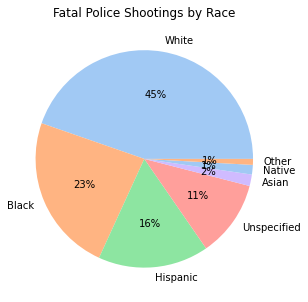

In [26]:
colors = sns.color_palette('pastel')[0:5]
race = df['race'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(race, labels = race.index, colors = colors, autopct='%.0f%%')
plt.title('Fatal Police Shootings by Race')

Fatal Police Shootings by Manner of death

Text(0.5, 1.0, 'Fatal Police Shootings by Manner of death')

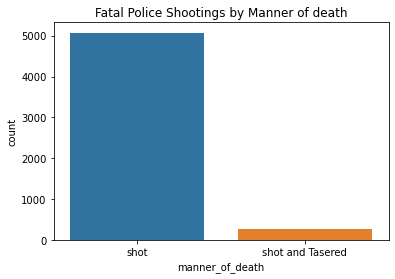

In [27]:
sns.countplot(x='manner_of_death',data=df)
plt.title('Fatal Police Shootings by Manner of death')

Fatal Police Shootings by Mental Illness

Text(0.5, 1.0, 'Fatal Police Shootings by Mental Illness')

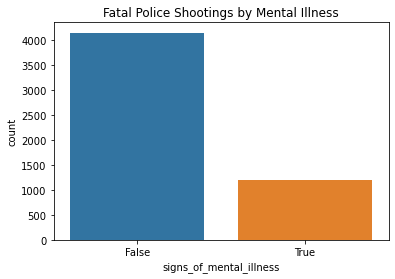

In [28]:
sns.countplot(x='signs_of_mental_illness',data=df)
plt.title('Fatal Police Shootings by Mental Illness')

Fatal Police Shootings by Threat Level

Text(0.5, 1.0, 'Fatal Police Shootings by Threat Level')

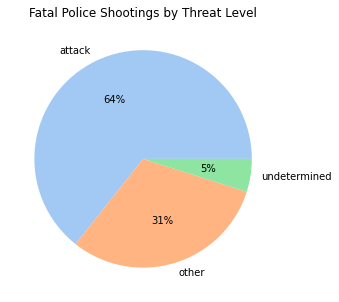

In [29]:
threat_level = df['threat_level'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(threat_level, labels = threat_level.index, colors = colors, autopct='%.0f%%')
plt.title('Fatal Police Shootings by Threat Level')

Fatal Police Shootings by Flee

Text(0.5, 1.0, 'Fatal Police Shootings by Flee')

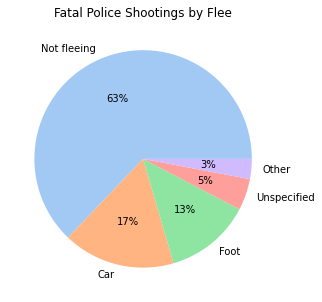

In [30]:
flee = df['flee'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(flee, labels = flee.index, colors = colors, autopct='%.0f%%')
plt.title('Fatal Police Shootings by Flee')

Fatal Police Shootings by Body Camera

Text(0.5, 1.0, 'Fatal Police Shootings by Body Camera')

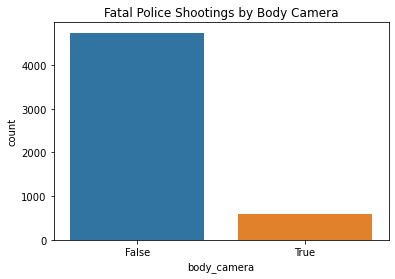

In [31]:
sns.countplot(x='body_camera',data=df)
plt.title('Fatal Police Shootings by Body Camera')

Age Distribution

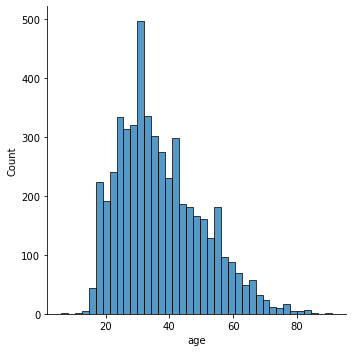

In [32]:
sns.displot(x='age', data=df)

Fatal Police Shootings by Generation

Text(0.5, 1.0, 'Fatal Police Shootings by Generation')

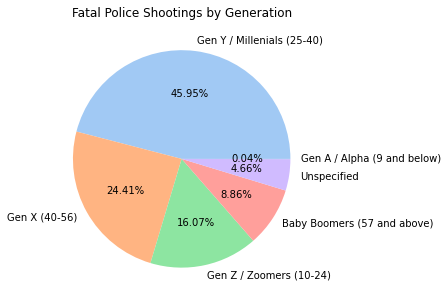

In [33]:
generation = df['generation'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(generation, labels = generation.index, colors = colors, autopct='%1.2f%%')
plt.title('Fatal Police Shootings by Generation')

Heatmap of Fatal Police Shootings in the US

Text(0.5, 1.0, 'Heatmap of Fatal Police Shootings in the US')

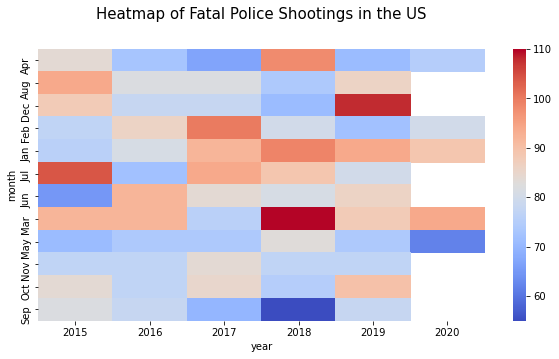

In [34]:
count_case = df.groupby(['month','year'])['date'].count().unstack()
plt.figure(figsize=(10,5))
sns.heatmap(count_case, cmap='coolwarm')
plt.title('Heatmap of Fatal Police Shootings in the US',loc='center',pad=30, fontsize=15)